In [1]:
##) Import modules
import os
import obspy
import matplotlib.pyplot as plt
from obspy import read, read_inventory, read_events, Stream
#from rf import read_rf

In [2]:
##2) Define node data directories and filenames
# Define data directory
data_dir = os.path.join('data', '')
# Define station inventory file    
invfile = data_dir + 'edited_stations.xml'
# Define event catalog file
catfile = data_dir + 'events.xml'
# Define raw data file
raw_datafile = data_dir + 'raw_waveform.h5'
# Define pre-processed data file.
pre_processed_datafile = data_dir + 'instruCorr_resampled.h5'

# Read station inventory file
inventory = read_inventory(invfile)
# Read event catalog file
catalog = read_events(catfile)
# Read raw and pre-processed data files
rawData = read(raw_datafile, 'H5')
preProcessedData = read(pre_processed_datafile, 'H5')

#rawData = read_rf(raw_datafile, 'H5')
#preProcessedData = read_rf(pre_processed_datafile, 'H5')

/home/evans/anaconda3/envs/seispy/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


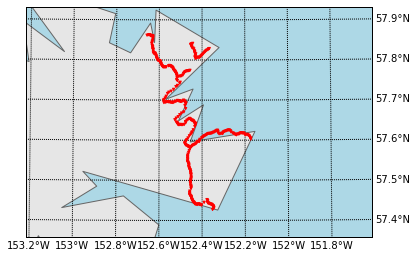

In [3]:
##) Plot stations
inventory.plot(projection='local', label=False, size=5.0, color='red', water_fill_color='lightblue');

/home/evans/anaconda3/envs/seispy/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


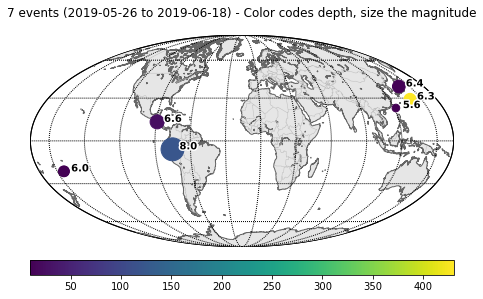

In [4]:
##) Plot events
catalog.plot();

In [5]:
## Print catalog summary
print(catalog)

7 Event(s) in Catalog:
2019-06-18T13:22:19.009000Z | +38.637, +139.480 | 6.4 Mww
2019-06-15T21:56:10.835000Z | -21.181, -174.169 | 6.1 Mww
2019-06-04T09:46:18.443000Z | +22.881, +121.670 | 5.6 Mww
2019-06-04T04:39:17.501000Z | +29.062, +139.293 | 6.3 Mww
2019-06-02T10:36:29.659000Z | -21.209, -173.908 | 6.0 Mww
2019-05-26T07:41:15.058000Z |  -5.813,  -75.278 | 8.0 Mww
2019-05-30T09:03:28.971000Z | +13.146,  -89.366 | 6.6 Mww


In [6]:
## Loop thru event catalog
count = 0
for event in catalog:
    count += 1
    print('Event#'+str(count))
    print(event.origins[0].time)
    print(event.event_descriptions[0].text)
    print('Magnitude: ' + str(event.magnitudes[0].mag) + ' Mww')
    print('Lat: ' + str(event.origins[0].latitude))
    print('Lon: ' + str(event.origins[0].longitude))
    print('Depth: ' + str(event.origins[0].depth/1000) + ' km')
    print("")

Event#1
2019-06-18T13:22:19.009000Z
NEAR WEST COAST OF HONSHU, JAPAN
Magnitude: 6.4 Mww
Lat: 38.637
Lon: 139.4804
Depth: 12.0 km

Event#2
2019-06-15T21:56:10.835000Z
TONGA ISLANDS
Magnitude: 6.1 Mww
Lat: -21.1807
Lon: -174.169
Depth: 13.0 km

Event#3
2019-06-04T09:46:18.443000Z
TAIWAN REGION
Magnitude: 5.6 Mww
Lat: 22.8813
Lon: 121.6704
Depth: 10.0 km

Event#4
2019-06-04T04:39:17.501000Z
SOUTHEAST OF HONSHU, JAPAN
Magnitude: 6.3 Mww
Lat: 29.0623
Lon: 139.2932
Depth: 430.3 km

Event#5
2019-06-02T10:36:29.659000Z
TONGA ISLANDS
Magnitude: 6.0 Mww
Lat: -21.2091
Lon: -173.9076
Depth: 10.0 km

Event#6
2019-05-26T07:41:15.058000Z
NORTHERN PERU
Magnitude: 8.0 Mww
Lat: -5.8132
Lon: -75.2775
Depth: 122.4 km

Event#7
2019-05-30T09:03:28.971000Z
EL SALVADOR
Magnitude: 6.6 Mww
Lat: 13.1462
Lon: -89.3663
Depth: 25.0 km



In [7]:
##) Print raw data summary
print(rawData)

8166 Trace(s) in Stream:

8J.1001..DP1 | 2019-05-26T07:53:21.779999Z - 2019-05-26T07:55:21.779999Z | 500.0 Hz, 60001 samples
...
(8164 other traces)
...
8J.9222..DPZ | 2019-06-18T13:30:19.827998Z - 2019-06-18T13:32:19.827998Z | 500.0 Hz, 60001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [8]:
##) Print pre-preprocessed data summary
print(preProcessedData)

8166 Trace(s) in Stream:

8J.1001..DP1 | 2019-05-26T07:53:21.779999Z - 2019-05-26T07:55:21.759999Z | 50.0 Hz, 6000 samples
...
(8164 other traces)
...
8J.9222..DPZ | 2019-06-18T13:30:19.827998Z - 2019-06-18T13:32:19.807998Z | 50.0 Hz, 6000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


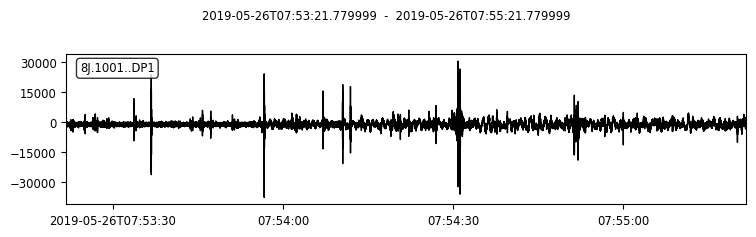

In [9]:
##) Plot the first raw data trace in stream
rawData[0].plot();

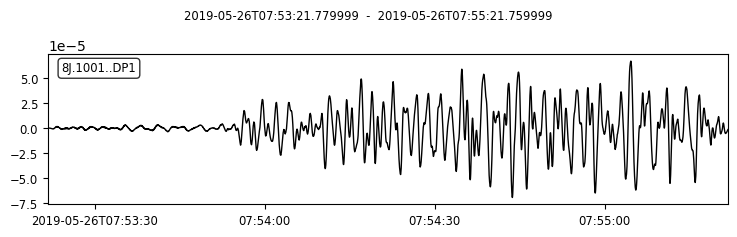

In [10]:
##) Plot the first pre-processed trace in stream
preProcessedData[0].plot();

In [36]:
##) Print raw data summary
print(rawData)

8166 Trace(s) in Stream:

8J.1001..DP1 | -30.0s - 90.0s onset:2019-05-26T07:53:51.779422Z | 500.0 Hz, 60001 samples | mag:8.0 dist:88.1 baz:103.8 slow:4.73
...
(8164 other traces)
...
8J.9222..DPZ | -30.0s - 90.0s onset:2019-06-18T13:30:49.828030Z | 500.0 Hz, 60001 samples | mag:6.4 dist:47.0 baz:277.0 slow:7.82

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [37]:
##) Print pre-preprocessed data summary
print(preProcessedData)

8166 Trace(s) in Stream:

8J.1001..DP1 | -30.0s - 90.0s onset:2019-05-26T07:53:51.779422Z | 50.0 Hz, 6000 samples | mag:8.0 dist:88.1 baz:103.8 slow:4.73
...
(8164 other traces)
...
8J.9222..DPZ | -30.0s - 90.0s onset:2019-06-18T13:30:49.828030Z | 50.0 Hz, 6000 samples | mag:6.4 dist:47.0 baz:277.0 slow:7.82

[Use "print(Stream.__str__(extended=True))" to print all Traces]


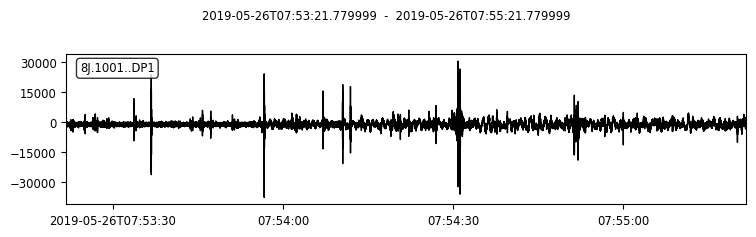

In [41]:
##) Plot the first raw data trace in stream
rawData[0].plot();

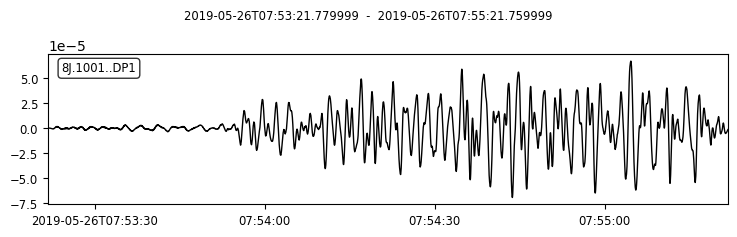

In [42]:
##) Plot the first pre-processed trace in stream
preProcessedData[0].plot();